NAME: JUHEE AVHAD

DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPAUGUST22

ADVANCED LEVEL TASK 2 : Next Word Prediction

STEP 1: IMPORT ALL THE REQUIRED PYTHON LIBRARIES

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [9]:
text = open('1661-0.txt' ,encoding ='UTF-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [11]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [12]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [13]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [14]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1


In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [18]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
811/811 [==============================] - 229s 280ms/step - loss: 5.8548 - accuracy: 0.1204 - val_loss: 7.1015 - val_accuracy: 0.0972
Epoch 2/10
811/811 [==============================] - 225s 278ms/step - loss: 5.7929 - accuracy: 0.1515 - val_loss: 7.8103 - val_accuracy: 0.1066
Epoch 3/10
811/811 [==============================] - 225s 277ms/step - loss: 5.7108 - accuracy: 0.1794 - val_loss: 7.9690 - val_accuracy: 0.1093
Epoch 4/10
811/811 [==============================] - 225s 277ms/step - loss: 5.3880 - accuracy: 0.2143 - val_loss: 8.2864 - val_accuracy: 0.0983
Epoch 5/10
811/811 [==============================] - 225s 277ms/step - loss: 5.0706 - accuracy: 0.2536 - val_loss: 8.3829 - val_accuracy: 0.0996
Epoch 6/10
811/811 [==============================] - 224s 277ms/step - loss: 4.8011 - accuracy: 0.2950 - val_loss: 8.5188 - val_accuracy: 0.0877
Epoch 7/10
811/811 [==============================] - 225s 277ms/step - loss: 4.5618 - accuracy: 0.3350 - val_loss: 8.8408 -

In [3]:
history

import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq
text = open('1661-0.txt' ,encoding ='UTF-8').read().lower()
print('corpus length:', len(text))
history


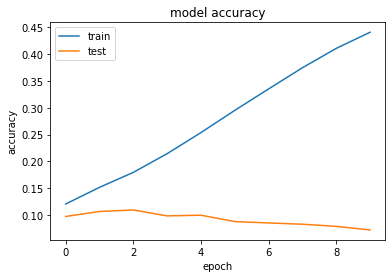

In [19]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

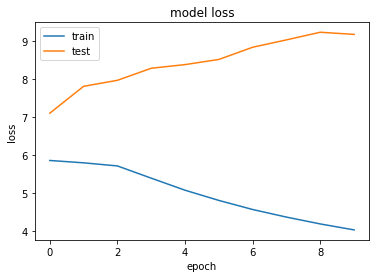

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [21]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [22]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [23]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [24]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'to', 'said', 'be', 'your']
